<h1>Covid Data Analysis</h1>
<p>The dataset used for this exercises is a part of <a href="https://www.kaggle.com/roche-data-science-coalition/uncover">Uncover Covid-19 Chanllenge</a> at <a href="https://www.kaggle.com">Kaggle</a>. I'm using a subpart of that dataset ad the name of the directory "nextstrain". </p>
<p>We are going to use pandas for the analysis, while seaborn and matplotlib are used for the visualization.</p>

<h3>Usefull Libraries</h3>
<p>Let's import few usefull resources</p>

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


<p>We are going to use two files namely "covid19GeneticPhylogeny" for this analysis so lets import them as pandas dataframe</p>

In [34]:
covid19 = pd.read_csv('nextstrain/covid19GeneticPhylogeny.csv')
covid19.head()

,strain,virus,gisaid_epi_isl,genbank_accession,date,region,country,division,location,region_exposure,...,length,host,age,sex,originating_lab,submitting_lab,authors,url,title,date_submitted
0,Algeria/G0638_2264/2020,ncov,EPI_ISL_418241,?,2020-03-02,Africa,Algeria,Boufarik,NaN,Africa,...,29862,Human,28,Female,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
1,Algeria/G0640_2265/2020,ncov,EPI_ISL_418242,?,2020-03-08,Africa,Algeria,Blida,NaN,Africa,...,29867,Human,87,Male,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
2,Algeria/G0860_2262/2020,ncov,EPI_ISL_420037,?,2020-03-02,Africa,Algeria,Boufarik,NaN,Africa,...,29862,Human,41,Male,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-04-04
3,Anhui/SZ005/2020,ncov,EPI_ISL_413485,?,2020-01-24,Asia,China,Anhui,Suzhou,Asia,...,29860,Human,58,Male,"Department of microbiology laboratory,Anhui Pr...","Department of microbiology laboratory,Anhui Pr...",Li et al,https://www.gisaid.org,?,2020-03-05
4,Argentina/C121/2020,ncov,EPI_ISL_420600,?,2020-03-07,South America,Argentina,NaN,NaN,South America,...,29903,Human,51,Male,Servicio Virosis Respiratorias-Departamento Vi...,Instituto Nacional Enfermedades Infecciosas C....,Baumeister et al,https://www.gisaid.org,?,2020-04-06


<h3>Data Preperation</h3>
<p>As the data contains ? we need to make sure that there isn't any other null values.</p>
<p>We need to evaluate the DataTypes of columns and missing</p>

In [35]:
covid19.replace('?', np.NaN, inplace=True)
print(covid19.count())
print(covid19.isnull().sum())

strain               4477
virus                4477
gisaid_epi_isl       4477
genbank_accession      62
date                 4477
region               4477
country              4477
division             4366
location             1107
region_exposure      4477
country_exposure     4477
division_exposure    4371
segment              4477
length               4477
host                 4477
age                  3284
sex                  3390
originating_lab      4477
submitting_lab       4477
authors              4477
url                  4477
title                   0
date_submitted       4477
dtype: int64
strain                  0
virus                   0
gisaid_epi_isl          0
genbank_accession    4415
date                    0
region                  0
country                 0
division              111
location             3370
region_exposure         0
country_exposure        0
division_exposure     106
segment                 0
length                  0
host                    0

<p>Lets remove the columns which we woud not use in our analysis</p>

In [36]:
covid19.drop(['date','strain','virus','genbank_accession','location','segment','length','host','originating_lab','submitting_lab','authors','url','title'], axis=1, inplace=True)
covid19.head()

,gisaid_epi_isl,region,country,division,region_exposure,country_exposure,division_exposure,age,sex,date_submitted
0,EPI_ISL_418241,Africa,Algeria,Boufarik,Africa,Algeria,Boufarik,28,Female,2020-03-29
1,EPI_ISL_418242,Africa,Algeria,Blida,Africa,Algeria,Blida,87,Male,2020-03-29
2,EPI_ISL_420037,Africa,Algeria,Boufarik,Africa,Algeria,Boufarik,41,Male,2020-04-04
3,EPI_ISL_413485,Asia,China,Anhui,Asia,China,Anhui,58,Male,2020-03-05
4,EPI_ISL_420600,South America,Argentina,NaN,South America,Argentina,NaN,51,Male,2020-04-06


<p>Now lets observe the data types of the columns</p>

In [37]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 10 columns):
gisaid_epi_isl       4477 non-null object
region               4477 non-null object
country              4477 non-null object
division             4366 non-null object
region_exposure      4477 non-null object
country_exposure     4477 non-null object
division_exposure    4371 non-null object
age                  3284 non-null object
sex                  3390 non-null object
date_submitted       4477 non-null object
dtypes: object(10)
memory usage: 349.9+ KB


In [38]:
covid19.date_submitted = pd.to_datetime(covid19.date_submitted)
covid19.sex = covid19.sex.astype('category')
covid19.age = covid19.age.astype('float')
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 10 columns):
gisaid_epi_isl       4477 non-null object
region               4477 non-null object
country              4477 non-null object
division             4366 non-null object
region_exposure      4477 non-null object
country_exposure     4477 non-null object
division_exposure    4371 non-null object
age                  3284 non-null float64
sex                  3390 non-null category
date_submitted       4477 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), object(7)
memory usage: 319.5+ KB


<div style="font-weight:bold">
    <p>Now lets ask few basic questions in terms of virus spread</p>
    <ul>
        <li>Which region which is most effected by Covid-19</li>
        <li>How genders are effected by the virus in the world</li>
        <li>Which age group is effected by the virus in the world</li>
        <li>Which are the top ten countries effected by Covid-19</li>
        <li>What is the status of virus spread in the Division of Top 10 countries</li>
        <li>What is the status of virus spread in the Division of Top 10 countries based on their genders</li>
        <li>What is the status of virus spread in the Division of Top 10 countries based on their age groups</li>
    </ul>
</div>

Europe is the top most effected region by the virus


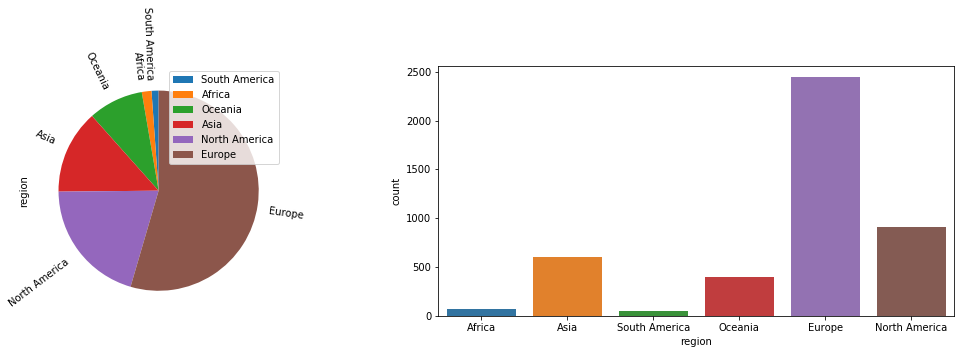

In [42]:
regionFractions = covid19.region.value_counts(normalize=True).sort_values()
fig, axes = plt.subplots(1,2,figsize=(15,5))
regionFractions.plot.pie(legend=True,rotatelabels=True, startangle = 90, ax =axes[0])
sns.countplot(x = 'region', data=covid19, ax =axes[1])
plt.tight_layout()
print('Europe is the top most effected region by the virus')

Weekly curve also translate the same story


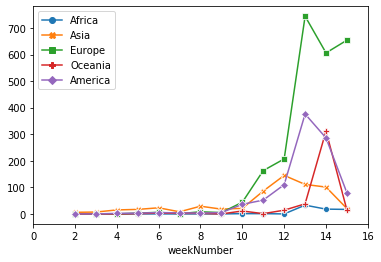

In [43]:
covid19['weekNumber'] = covid19.date_submitted.dt.week
weekNumberRegion = covid19.groupby(['weekNumber','region']).size().to_frame('size')
weekNumberRegionPivot = weekNumberRegion.pivot_table(index='weekNumber', columns=['region'], values = 'size',fill_value = 0)
weekNumberRegionPivot['America'] = weekNumberRegionPivot['North America'] + weekNumberRegionPivot['South America']
weekNumberRegionPivot.drop(['North America', 'South America'], axis=1, inplace=True)
sns.lineplot(hue="region", style="event", markers=True, dashes=False, data=weekNumberRegionPivot)
plt.xlim(0,16)
print('Weekly curve also translate the same story')

<p>We can clearly observe that Europe is the most effected region.</p>
<p>Lets focus on the second question</p>

According to results males are more effected by the virus then the females


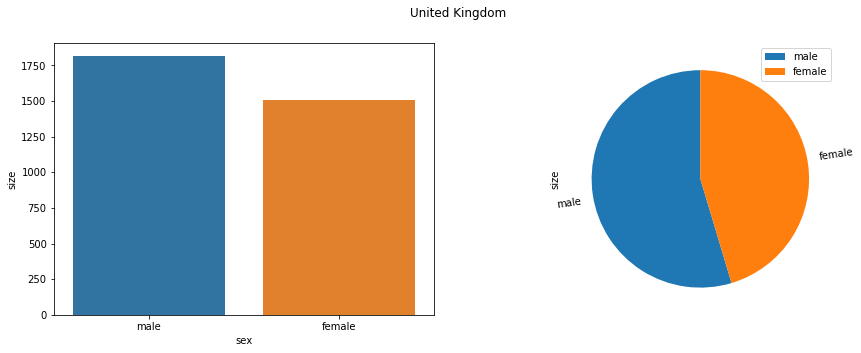

In [49]:
covid19['sex'] = covid19.sex.str.lower()
genderDisDetails = pd.DataFrame(covid19[(covid19.sex.str.lower() == 'female') | (covid19.sex.str.lower() == 'male')].groupby('sex').size().sort_values(ascending = False))
genderDisDetails.rename(columns={0:'size'}, inplace=True)

fig, axes = plt.subplots(1,2,figsize=(15,5))
genderDisDetailsBarChart = sns.barplot(data=genderDisDetails, x=genderDisDetails.index, y='size', ax =axes[0])
genderDisDetailsFraction = genderDisDetails['size'] / genderDisDetails['size'].sum()
genderDisDetailsFraction.plot(kind='pie', subplots=True,title = key,legend=True,rotatelabels=True ,yticks=None, startangle = 90, ax =axes[1])
print('According to results males are more effected by the virus then the females')

Adults are more infected by the virus as compare to other age groups


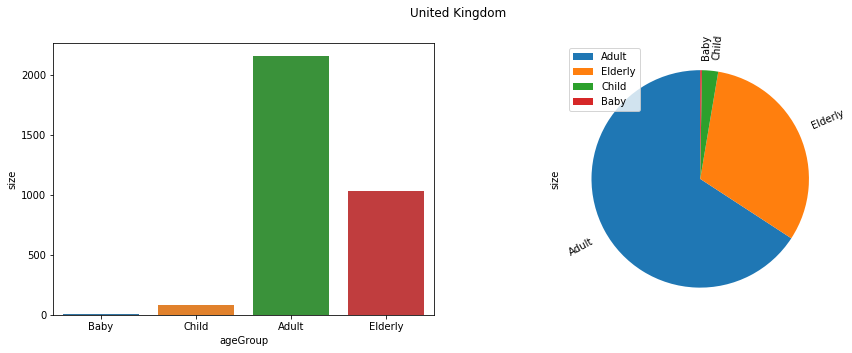

In [53]:
covid19['ageGroup'] = pd.cut(covid19[covid19['age']>0].age, bins=[0,2,17,60,99],labels=['Baby','Child','Adult','Elderly'])
ageDistDetails = pd.DataFrame(covid19.dropna(subset = ["ageGroup"]).groupby('ageGroup').size().sort_values(ascending = False))
ageDistDetails.rename(columns={0:'size'}, inplace=True)
fig, axes = plt.subplots(1,2,figsize=(15,5))
divBarChart = sns.barplot(data=ageDistDetails, x=ageDistDetails.index, y='size', ax =axes[0])
ageDetailsFraction = ageDistDetails['size'] / ageDistDetails['size'].sum()
ageDetailsFraction.plot(kind='pie', subplots=True,title = key,legend=True,rotatelabels=True ,yticks=None, startangle = 90, ax =axes[1])

print('Adults are more infected by the virus as compare to other age groups')

Following are the top ten countries infected by the virus.According to this dataset top effected country is United Kingdom. It is correct according to data however the main reason here is details of other countries are still missing


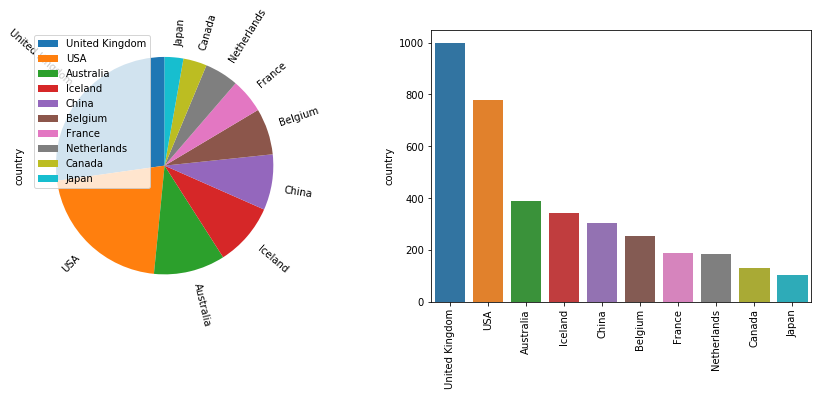

In [56]:
countryCount = pd.DataFrame(covid19.country.value_counts().sort_values(ascending=False))
top10Count = countryCount.iloc[:10]
top10Frac = top10Count.country / top10Count.country.sum()

fig, axes = plt.subplots(1,2,figsize=(15,5))
top10Frac.plot(kind='pie', subplots=True,legend=True,yticks=None,rotatelabels=True , startangle = 90, ax =axes[0])

chartTop10Count = sns.barplot(data=top10Count, x=top10Count.index, y='country', ax =axes[1])
chartTop10Count.set_xticklabels(chartTop10Count.get_xticklabels(),rotation=90)

print('Following are the top ten countries infected by the virus.According to this dataset top effected country is United Kingdom. It is correct according to data however the main reason here is details of other countries are still missing')

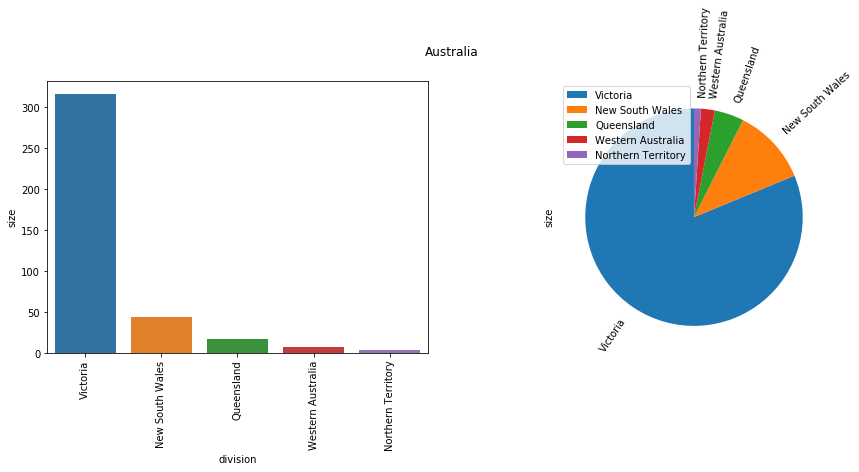

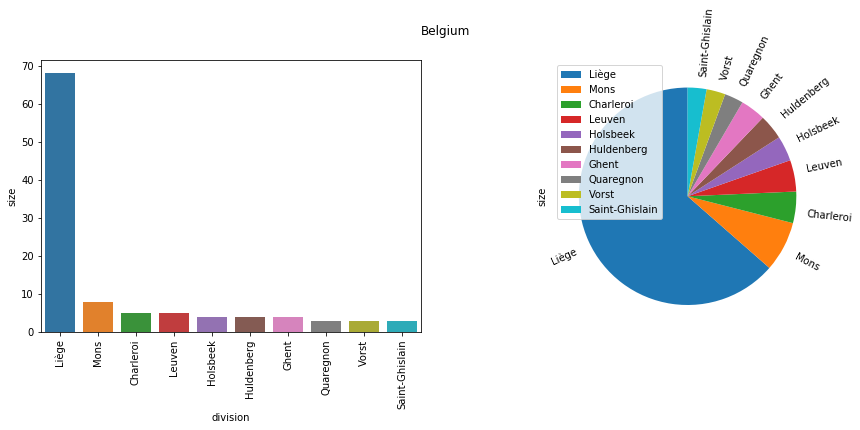

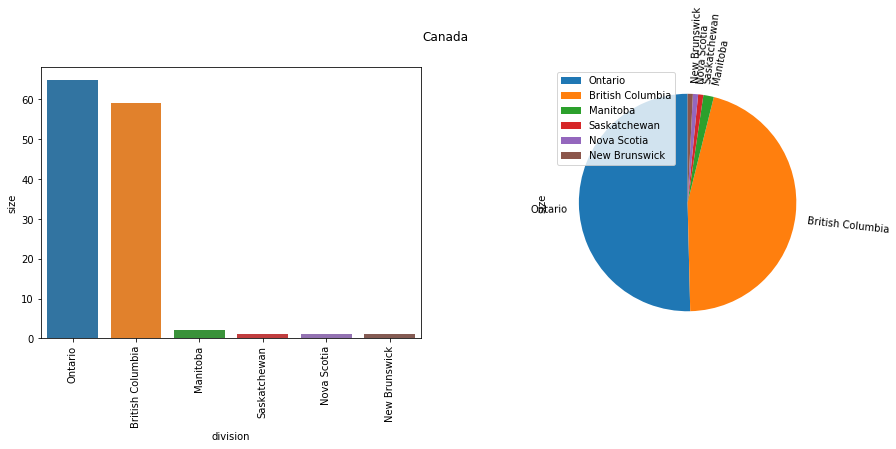

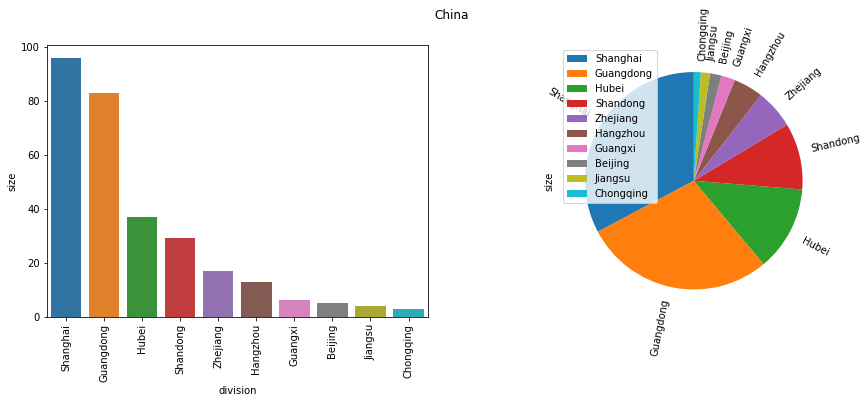

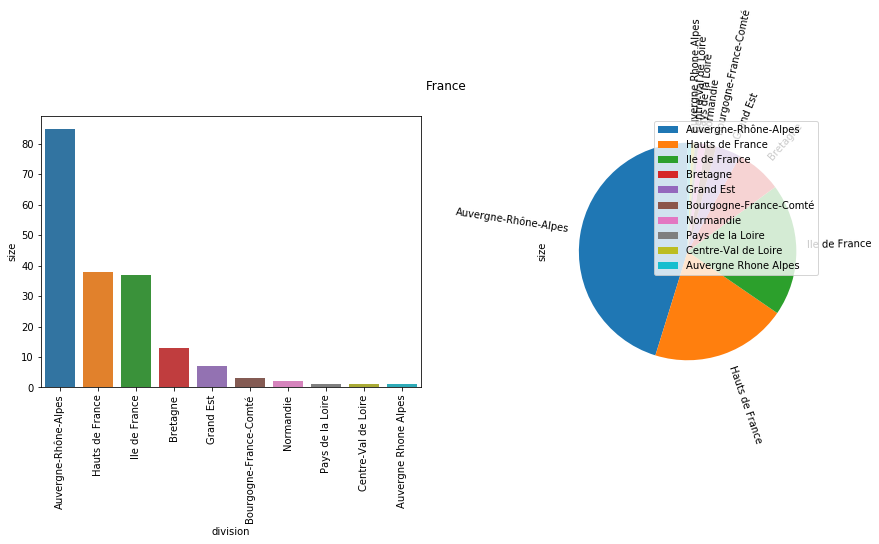

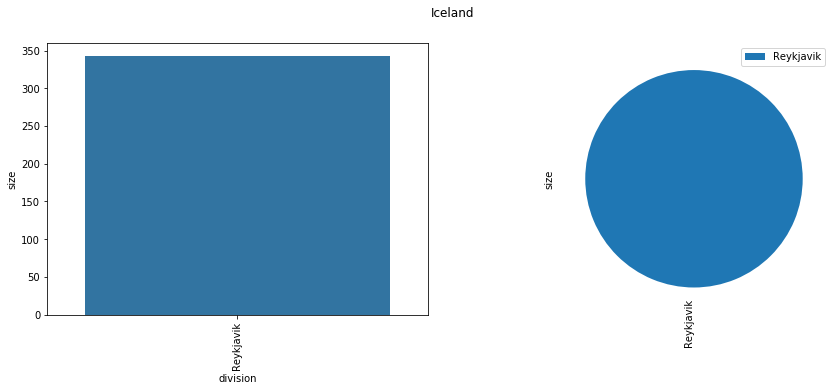

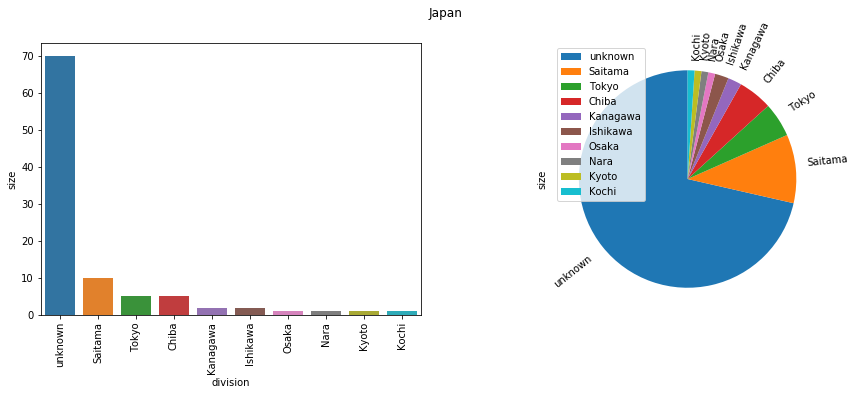

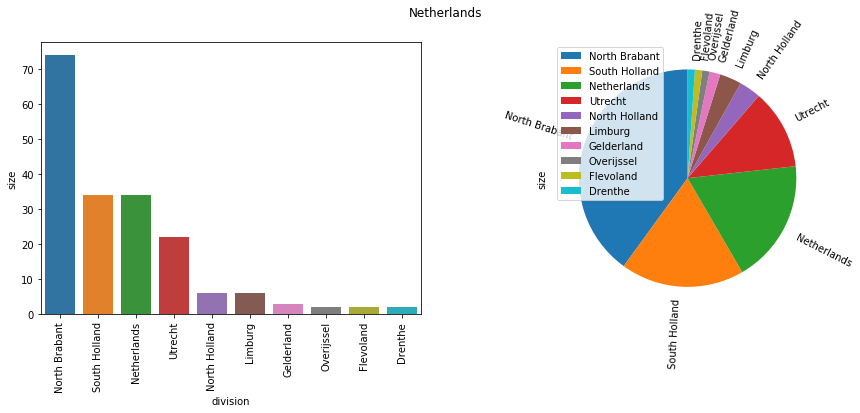

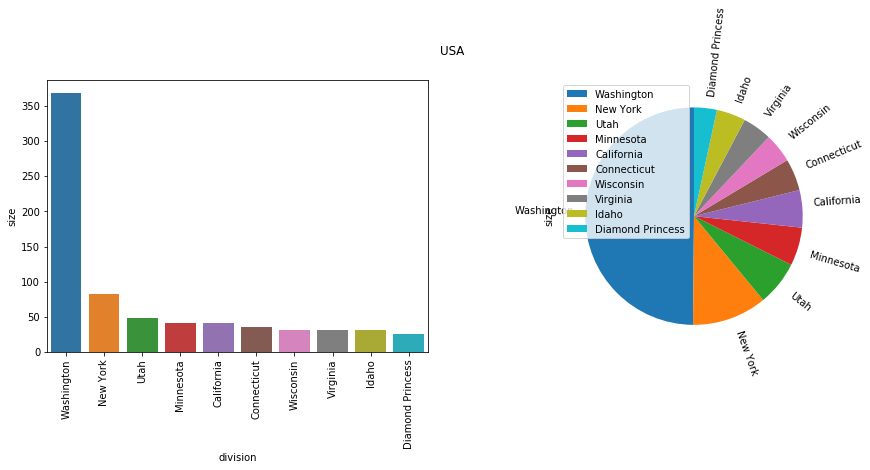

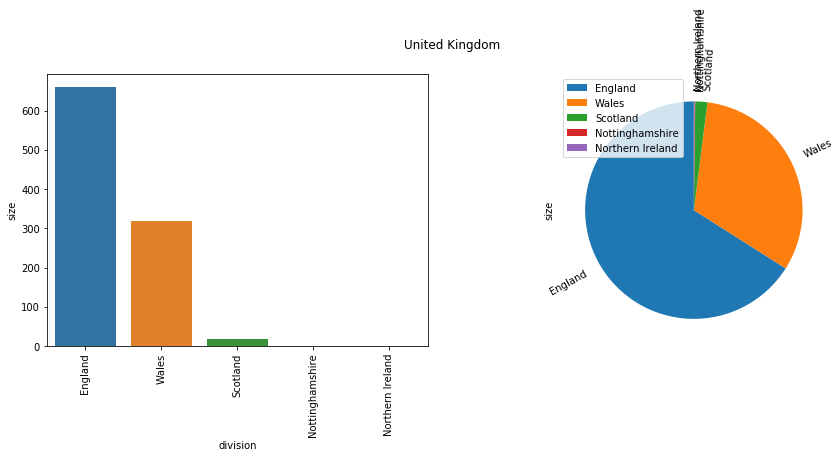

In [57]:
top10CountDiv = covid19[covid19['country'].isin(top10Count.index.to_list())].groupby('country')

for key,group_df in top10CountDiv:
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    division = pd.DataFrame(group_df.groupby('division').size().sort_values(ascending = False))
    division.rename(columns={0:'size'}, inplace=True)
    if(len(division) > 10):
        division = division[:10]
    
    divBarChart = sns.barplot(data=division, x=division.index, y='size', ax =axes[0])
    divBarChart.set_xticklabels(divBarChart.get_xticklabels(),rotation=90)
    
    divisionFraction = division['size'] / division['size'].sum()
    divisionFraction.plot(kind='pie', subplots=True,title = key,legend=True,rotatelabels=True ,yticks=None, startangle = 90, ax =axes[1])

Now lets focus on the gender status in Top 10 effecting countries
    Note we have to remove Netherlands because the gender information was missing

H:\ProgramFiles\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


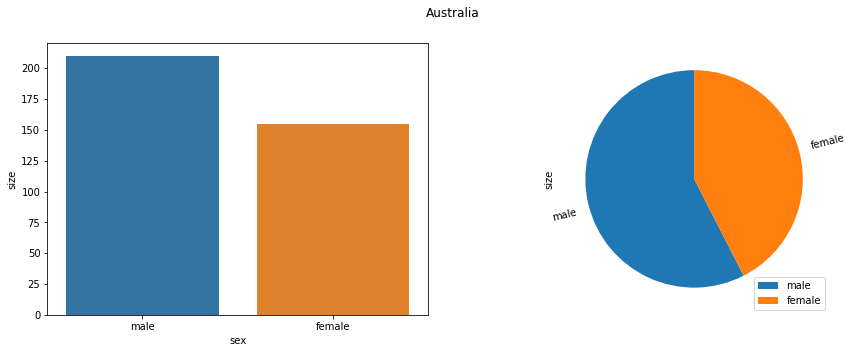

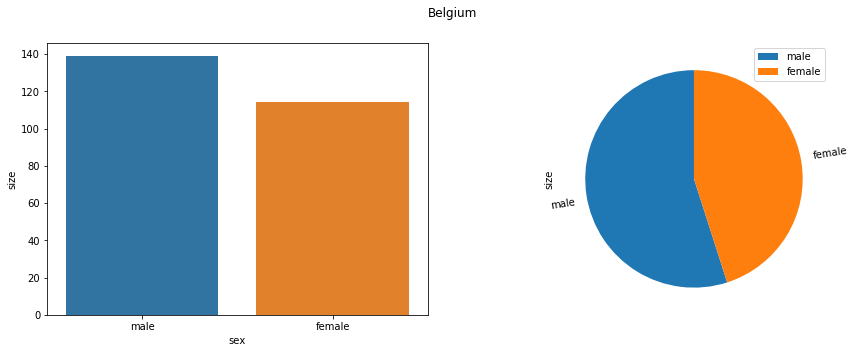

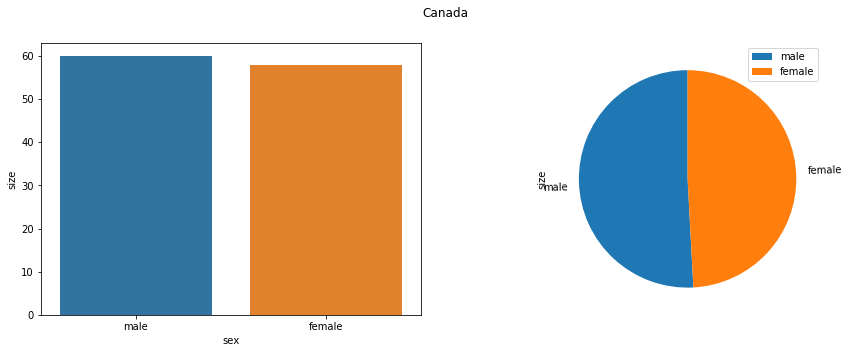

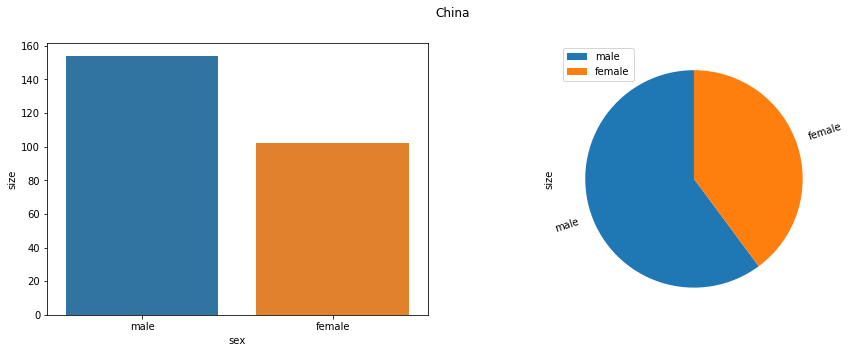

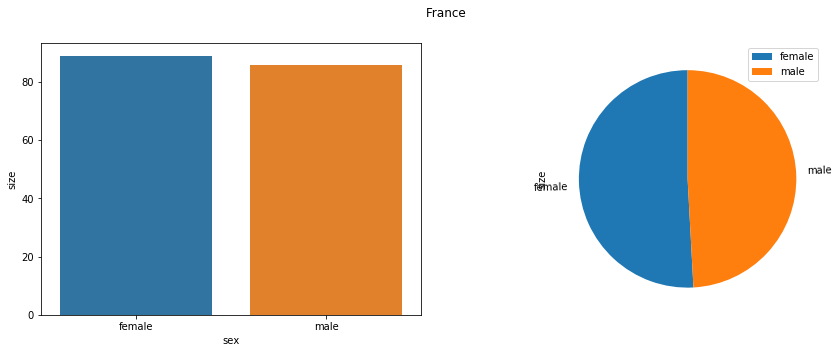

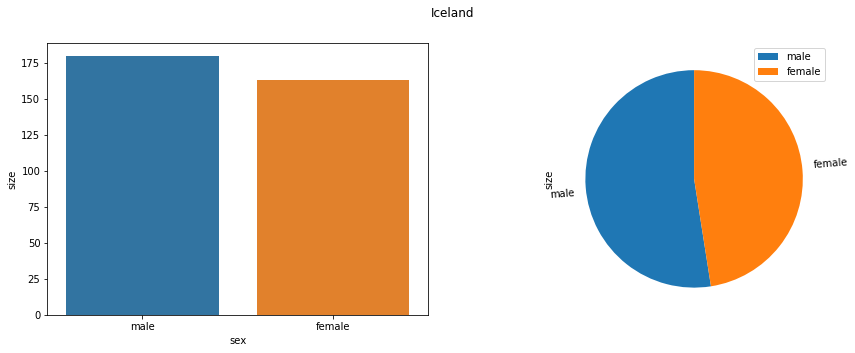

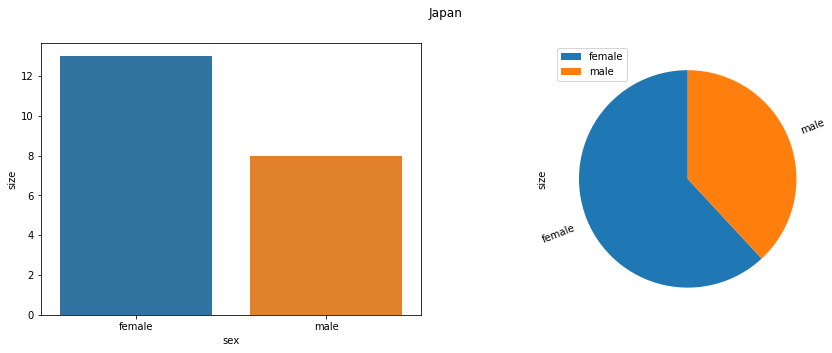

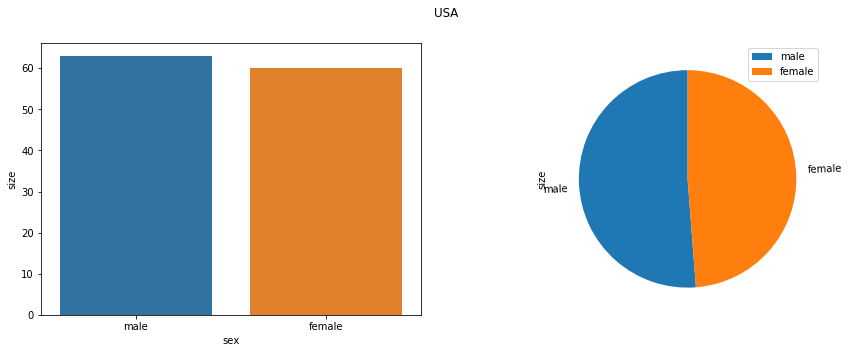

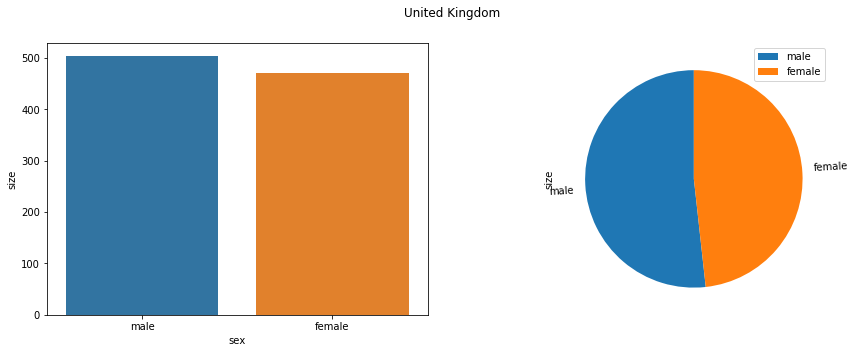

In [61]:
for key,group_df in top10CountDiv:
    group_df['sex'] = group_df.sex.str.lower()
    genderDist = pd.DataFrame(group_df[(group_df.sex.str.lower() == 'female') | (group_df.sex.str.lower() == 'male')].groupby('sex').size().sort_values(ascending = False))
    genderDist.rename(columns={0:'size'}, inplace=True)
    if(len(genderDist)> 0):
        fig, axes = plt.subplots(1,2,figsize=(15,5))
        divBarChart = sns.barplot(data=genderDist, x=genderDist.index, y='size', ax =axes[0])
        genderFraction = genderDist['size'] / genderDist['size'].sum()
        genderFraction.plot(kind='pie', subplots=True,title = key,legend=True,rotatelabels=True ,yticks=None, startangle = 90, ax =axes[1])

H:\ProgramFiles\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Adults are more infected by the virus, even when we observe coutries separtely


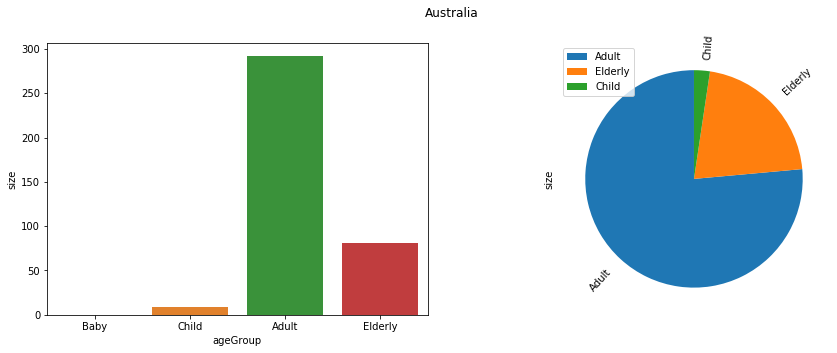

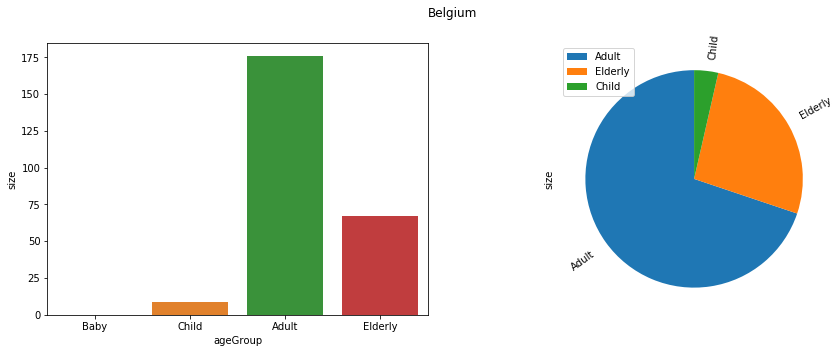

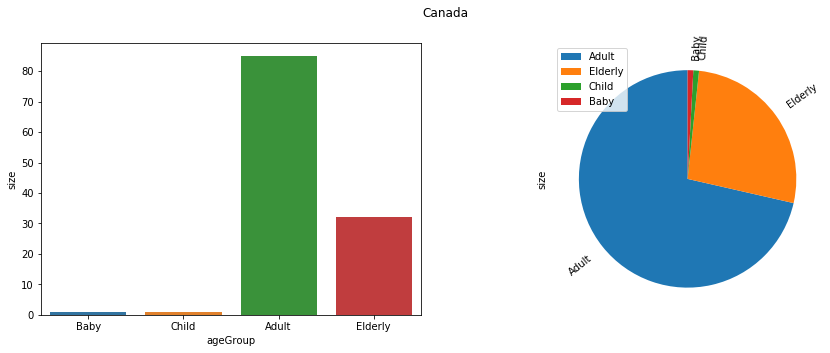

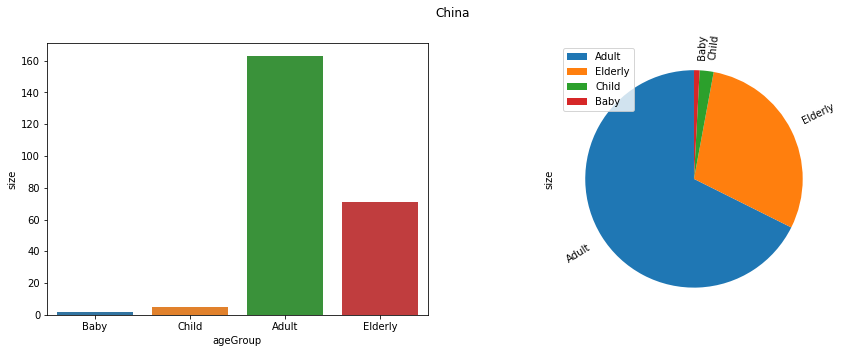

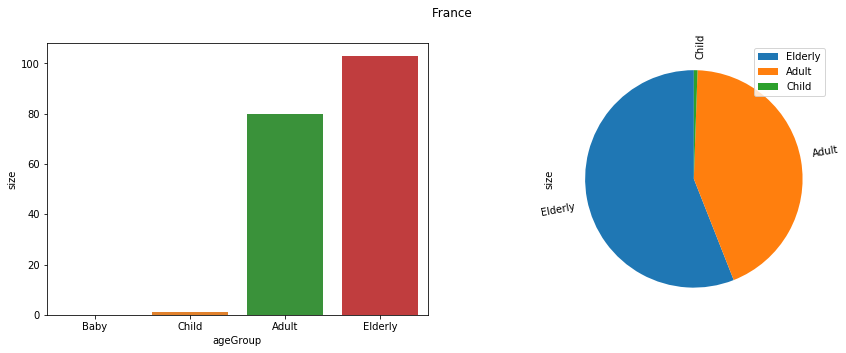

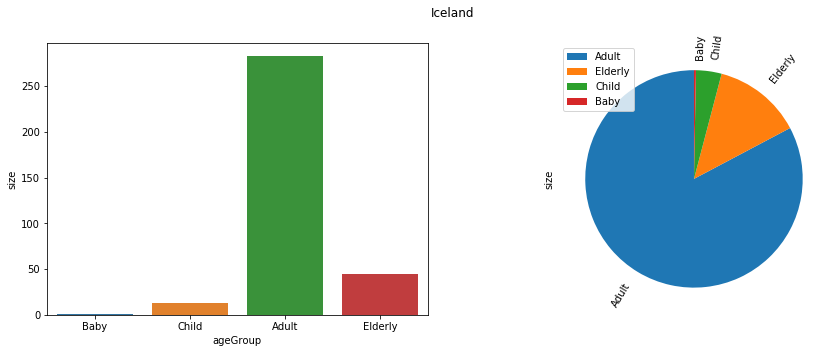

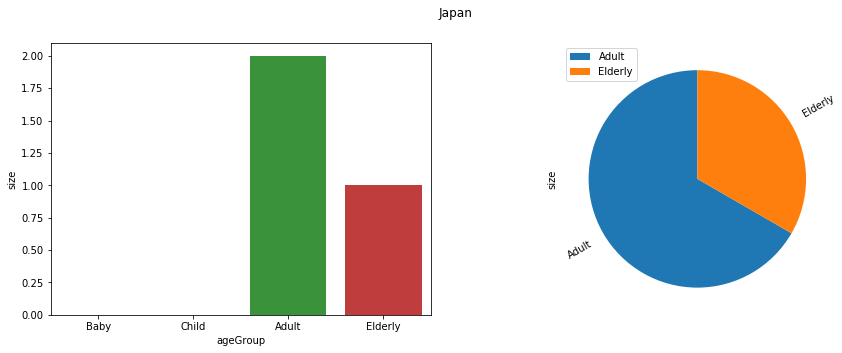

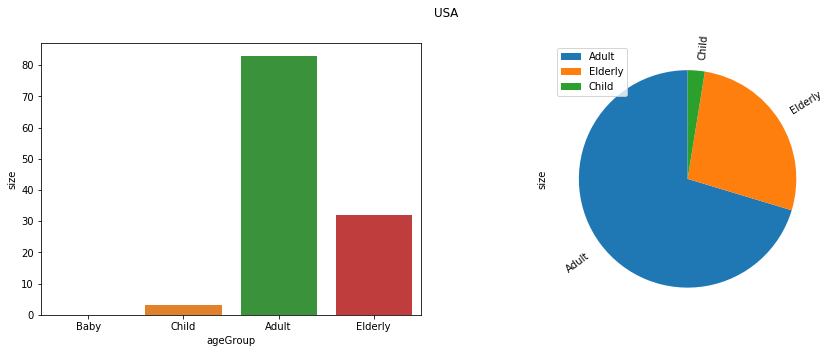

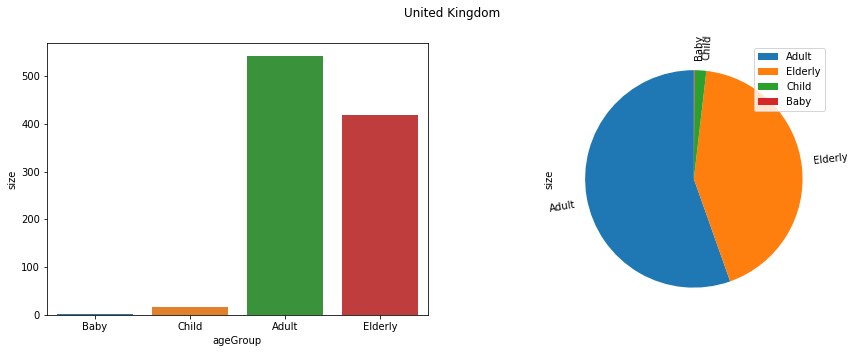

In [72]:
for key,group_df in top10CountDiv:
    group_df.dropna(subset = ["age"], inplace=True)
    if(len(group_df)>0):
        ageDist = pd.DataFrame(group_df.groupby('ageGroup').size().sort_values(ascending = False))
        ageDist.rename(columns={0:'size'}, inplace=True)
        fig, axes = plt.subplots(1,2,figsize=(15,5))
        ageGroupDivBarChart = sns.barplot(data=ageDist, x=ageDist.index, y='size', ax =axes[0])
        ageFraction = ageDist['size'] / ageDist['size'].sum()
        ageFraction.plot(kind='pie', subplots=True,title = key,legend=True,rotatelabels=True ,yticks=None, startangle = 90, ax =axes[1])
        
print('Adults are more infected by the virus, even when we observe coutries separtely')